# YZV 211E 
# Homework 1 
### Prepared by Res. Asst. Yaren Yılmaz
yilmazy20@itu.edu.tr

In the world of AI, the ability to access and manipulate data from various sources is a fundamental skill. This assignment is designed to give you hands-on experience in working with Application Programming Interfaces (APIs), which allow different software systems to interact and share information. You will be tasked with obtaining data from two public APIs, applying data transformation techniques to filter and process the received information, and finally, visualizing the results.
<p align="center">
  <img src="https://rapidapi.com/blog/wp-content/uploads/2023/03/What-is-an-API-definition.webp" width="600" height="400" alt="convert notebook to web app">
</p>

**Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.**

In [135]:
# You can use the following libraries if you need them.
import requests
from datetime import datetime, timedelta

import time
import pandas as pd
import matplotlib.pyplot as plt

### What is Kraken API ?

The Kraken Public REST API is a part of the Kraken cryptocurrency exchange's API suite that provides access to publicly available market data and information without requiring user authentication. Here's a brief summary of the key features of the Kraken Public REST API:

1. **Market Data**: The API allows users to access a wide range of market data, including order book snapshots, recent trade history, and historical OHLCV (Open/High/Low/Close/Volume) data for various cryptocurrency trading pairs.

2. **Asset Information**: Users can retrieve information about available cryptocurrency assets, their trading pairs, and other details related to the exchange's offerings.

3. **Ticker Information**: The API provides real-time and historical price ticker information for trading pairs on Kraken.

4. **Time Information**: Developers can access the current time on the Kraken server, which is useful for synchronizing their applications with the exchange.

5. **Supported Pairs**: Kraken supports a wide range of cryptocurrency pairs and trading instruments, and the Public REST API enables users to query the available pairs and their details.

6. **Rate Limiting**: Kraken imposes rate limits on API requests to prevent abuse and ensure fair usage of their resources. These rate limits are important to keep in mind when using the API.


### Part 1: Get BTC Data from REST API 25p

In this part, you will use [Get OHCL Data Public Endpoint](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData). The goal is receiving hourly BTC price and volume data. Define the pair as 'XXBTZUSD'.
* Show the data.

   
The Documentation shows:
* Query Parameter
* Response Schema
* Request Sample
* Response Sample

In [136]:
#getting BTC price
response = requests.get('https://api.kraken.com/0/public/OHLC?pair=XXBTZUSD&interval=60')
if response.status_code == 200:
    main_data = response.json()
    print(main_data)
  

{'error': [], 'result': {'XXBTZUSD': [[1696266000, '28000.0', '28120.3', '27899.5', '28082.9', '27985.9', '305.05564677', 1735], [1696269600, '28083.0', '28107.5', '27689.9', '27802.1', '27838.6', '241.49458456', 2195], [1696273200, '27802.1', '27969.4', '27649.0', '27969.2', '27759.4', '145.86196325', 1563], [1696276800, '27969.3', '27969.3', '27833.5', '27835.1', '27869.6', '81.18550468', 998], [1696280400, '27835.1', '27870.2', '27298.0', '27483.2', '27581.2', '449.31481526', 2997], [1696284000, '27482.9', '27573.9', '27371.4', '27564.8', '27517.9', '308.08415262', 1490], [1696287600, '27564.8', '27619.1', '27445.0', '27500.9', '27523.8', '283.36422975', 1183], [1696291200, '27500.9', '27566.4', '27425.2', '27425.3', '27508.9', '49.61613593', 872], [1696294800, '27425.2', '27552.2', '27385.4', '27552.2', '27448.0', '33.94566281', 750], [1696298400, '27552.1', '27601.3', '27501.9', '27595.0', '27543.6', '165.22506229', 986], [1696302000, '27595.1', '27629.3', '27551.0', '27601.0', '2

### Part 2: BTC Data to Pandas Dataframe & Filtering 25p

You should complete some tasks using [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) . After receiving the BTC data using API, it is expected to filter the dataset by date. The dataset should include price values only between times 'October 10, 2023 00\:00\:00' and 'October 17, 2023 20\:00\:00'.

After that, we need to find the hours with the highest price increase and the hours with the highest price decrease. Price change can be calculated as the difference between the closing and opening prices for the given time.

* For example if open=10 and close=20 for one hour, it means the price increasing. The price change is calculated as 20-10=10.
* If open=10 and close=5 for one hour, it means the price descreasing. The price change is calculated as 5-10=-5.


* Show the hours you found.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData) for meaningful column names.


In [137]:
#printing OHLC data
OHLC_data = main_data['result']['XXBTZUSD']

#naming columns
data_colums = ['time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count']

#creating DataFrame from OHLC data
dataframe = pd.DataFrame(OHLC_data, columns=data_colums)    
dataframe['time'] = pd.to_datetime(dataframe['time'], unit='s')
     

In [138]:
#filtering dataset according to beginning and ending dates
beginning_date = pd.Timestamp("2023-10-10 00:00:00")
ending_date = pd.Timestamp("2023-10-17 20:00:00")
dataframe_filter = dataframe[(dataframe['time'] >= beginning_date) & (dataframe['time'] <= ending_date)]

In [139]:
#defining price changes
dataframe_filter = dataframe_filter.copy()
dataframe_filter['open'] = pd.to_numeric(dataframe_filter['open'])
dataframe_filter['close'] = pd.to_numeric(dataframe_filter['close'])
dataframe_filter.loc[:, 'price_change'] = dataframe_filter['close'] - dataframe_filter['open']
  

In [140]:
hour_with_highest_price_increase = dataframe_filter.loc[dataframe_filter['price_change'].idxmax()]           #determining hours with the highest increase
hour_with_highest_price_decrease = dataframe_filter.loc[dataframe_filter['price_change'].idxmin()]           #determining hours with the highest decrease

In [141]:
print("Max increase hour: ")
print(hour_with_highest_price_increase)          #printing the hour with maximum increase
print("Max decrease hour: ")
print(hour_with_highest_price_decrease)          #printing the hour with maximum decrease

Max increase hour: 
time            2023-10-16 05:00:00
open                        27262.0
high                        27970.0
low                         27261.9
close                       27913.1
vwap                        27641.7
volume                 560.49845700
count                          3821
price_change                  651.1
Name: 324, dtype: object
Max decrease hour: 
time            2023-10-11 02:00:00
open                        27435.9
high                        27437.5
low                         27061.0
close                       27120.9
vwap                        27215.1
volume                 181.26133886
count                          1718
price_change                 -315.0
Name: 201, dtype: object


### Part 3: Get Trade Data from REST API 25p

Now, we have two timestamp values of the highest price changes. We want to analyze these hours in more detail by looking their trades. You will use the public endpoint called [Get Recent Trade](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades). You should find all the trades within the selected hours, that you have already found in Part 2.
* For example if selected_ts=1697500800 (dt = '2023-10-17 00\:00\:00'), you should include all the trades between '2023-10-17 00\:00\:00'  and '2023-10-17 01\:00\:00'.
* Show the trade data.

**Note:** The first few trades after 1 hour can be ignored, because it depends on the 'count' parameter you choose.

In [142]:
#determining time interval for selected_ts_1
selected_ts_1 = hour_with_highest_price_increase['time']
ending_trade_time_1 = datetime.utcfromtimestamp(selected_ts_1.timestamp() + 3600)     #3600 means 1 hour in seconds which is our interval

#determining time interval for selected_ts_2
selected_ts_2 = hour_with_highest_price_decrease['time']
ending_trade_time_2 = datetime.utcfromtimestamp(selected_ts_2.timestamp() + 3600)     #3600 means 1 hour in seconds which is our interval

#converting selected_ts_1 and selected_ts_2 to timestamps
selected_ts_1_timestamp_int = selected_ts_1.timestamp()
selected_ts_2_timestamp_int = selected_ts_2.timestamp()

print(selected_ts_1_timestamp_int)
print(selected_ts_2_timestamp_int)


1697432400.0
1696989600.0


In [143]:
#getting response for 1.set of data by sending request to Kraken API for trade data since the timestamp 1697421600
response_trade_1 = requests.get('https://api.kraken.com/0/public/Trades?pair=XBTUSD&since=1697432400')
response_trade_1 = response_trade_1.json()
print(response_trade_1)

#getting response for 2.set of data by sending request to Kraken API for trade data since the timestamp 1697425649024867546
response_trade_2 = requests.get('https://api.kraken.com/0/public/Trades?pair=XBTUSD&since=1697433409000188714')
response_trade_2 = response_trade_2.json()
print(response_trade_2)

#getting response for 3.set of data by sending request to Kraken API for trade data since the timestamp 1697433000625486353
response_trade_3 = requests.get('https://api.kraken.com/0/public/Trades?pair=XBTUSD&since=1697433670528567900')
response_trade_3 = response_trade_3.json()
print(response_trade_3)

#getting response for 4.set of data by sending request to Kraken API for trade data since the timestamp 1697433410277903892
response_trade_4 = requests.get('https://api.kraken.com/0/public/Trades?pair=XBTUSD&since=1697434573382678593')
response_trade_4 = response_trade_4.json()
print(response_trade_4)

#getting response for 5.set of data by sending request to Kraken API for trade data since the timestamp 1696978800
response_trade_5 = requests.get('https://api.kraken.com/0/public/Trades?pair=XBTUSD&since=1696989600')
response_trade_5 = response_trade_5.json()
print(response_trade_5)

#getting response for 6.set of data by sending request to Kraken API for trade data since the timestamp 1696982960620058270
response_trade_6 = requests.get('https://api.kraken.com/0/public/Trades?pair=XBTUSD&since=1696991681863550698')
response_trade_6 = response_trade_6.json()
print(response_trade_6)

{'error': [], 'result': {'XXBTZUSD': [['27262.00000', '0.00036139', 1697432400.0542483, 'b', 'l', '', 63366956], ['27262.00000', '0.00033862', 1697432432.7201927, 'b', 'l', '', 63366957], ['27262.00000', '0.00375000', 1697432464.8013833, 'b', 'm', '', 63366958], ['27262.00000', '0.01600000', 1697432469.0310173, 'b', 'm', '', 63366959], ['27262.00000', '2.01000000', 1697432478.8455489, 'b', 'm', '', 63366960], ['27262.00000', '0.07335411', 1697432502.4782622, 'b', 'l', '', 63366961], ['27262.00000', '0.00132785', 1697432570.8074646, 'b', 'm', '', 63366962], ['27261.90000', '0.00036742', 1697432570.9508789, 's', 'm', '', 63366963], ['27262.00000', '0.01045038', 1697432596.921994, 'b', 'm', '', 63366964], ['27262.00000', '1.00000000', 1697432601.961864, 'b', 'm', '', 63366965], ['27262.00000', '0.00137041', 1697432645.4421153, 'b', 'm', '', 63366966], ['27262.00000', '0.00097828', 1697432656.076126, 'b', 'm', '', 63366967], ['27262.00000', '0.00161160', 1697432666.3375697, 'b', 'l', '', 6

In [144]:
#extracting trade data for the first set of trades with the trading pair 'XXBTZUSD'
response_trade_1 = response_trade_1['result']['XXBTZUSD']
response_trade_2 = response_trade_2['result']['XXBTZUSD']
response_trade_3 = response_trade_3['result']['XXBTZUSD']
response_trade_4 = response_trade_4['result']['XXBTZUSD']

#extracting trade data for the second set of trades with the trading pair 'XXBTZUSD'
response_trade_5 = response_trade_5['result']['XXBTZUSD']
response_trade_6 = response_trade_6['result']['XXBTZUSD']

#creating DataFrames for the first set of trades from extracted trade data and specifying column names
dataframe_1 = pd.DataFrame(response_trade_1, columns=['price', 'volume', 'time', 'buy/sell', 'market_limit', 'miscellaneous', 'trade_id'])
dataframe_2 = pd.DataFrame(response_trade_2, columns=['price', 'volume', 'time', 'buy/sell', 'market_limit', 'miscellaneous', 'trade_id'])
dataframe_3 = pd.DataFrame(response_trade_3, columns=['price', 'volume', 'time', 'buy/sell', 'market_limit', 'miscellaneous', 'trade_id'])
dataframe_4 = pd.DataFrame(response_trade_4, columns=['price', 'volume', 'time', 'buy/sell', 'market_limit', 'miscellaneous', 'trade_id'])

#creating DataFrames for the second set of trades from extracted trade data and specifying column names
dataframe_5 = pd.DataFrame(response_trade_5, columns=['price', 'volume', 'time', 'buy/sell', 'market_limit', 'miscellaneous', 'trade_id'])
dataframe_6 = pd.DataFrame(response_trade_6, columns=['price', 'volume', 'time', 'buy/sell', 'market_limit', 'miscellaneous', 'trade_id'])

#concatenating DataFrames for the first set of trades into one DataFrame
dataframe_increase = pd.concat([dataframe_1, dataframe_2, dataframe_3, dataframe_4])
#concatenating DataFrames for the second set of trades into one DataFrame
dataframe_decrease = pd.concat([dataframe_5, dataframe_6])

print(dataframe_increase)       #printing the first concatenated DataFrame that is created from the first set of trades 
print(dataframe_decrease)       #printing the second concatenated DataFrame that is created from the second set of trades

           price      volume          time buy/sell market_limit  \
0    27262.00000  0.00036139  1.697432e+09        b            l   
1    27262.00000  0.00033862  1.697432e+09        b            l   
2    27262.00000  0.00375000  1.697432e+09        b            m   
3    27262.00000  0.01600000  1.697432e+09        b            m   
4    27262.00000  2.01000000  1.697432e+09        b            m   
..           ...         ...           ...      ...          ...   
995  27955.90000  0.00070237  1.697436e+09        b            l   
996  27955.90000  0.00100000  1.697436e+09        b            m   
997  27955.90000  0.00710000  1.697436e+09        b            m   
998  27951.60000  0.00080000  1.697436e+09        b            m   
999  27951.60000  0.00026144  1.697436e+09        b            l   

    miscellaneous  trade_id  
0                  63366956  
1                  63366957  
2                  63366958  
3                  63366959  
4                  63366960  
.. 

### Part 4: Trade Data to Pandas Dataframe & Analysis 25p

In the last part, it is expected to visualize your result. We want to see how the average volume of hours, with the highest price increase and highest price decrease, differ in buying and selling transactions. You should use bar plot where 'x' axis should represent the unique values of 'buy/sell' column and 'y' axis should represent the mean of volume.

In the end, you should obtain two different bar plots. One for the highest increase and one for the the highest decrease.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades) for meaningful column names.


In [145]:
increase_buying = dataframe_increase[dataframe_increase['buy/sell'] == 'b']     #extracting rows from the "dataframe_increase" DataFrame where 'buy/sell' column is buying ('b')
increase_selling = dataframe_increase[dataframe_increase['buy/sell'] == 's']    #extracting rows from the "dataframe_increase" DataFrame where 'buy/sell' column is selling ('s')

decrease_buying = dataframe_decrease[dataframe_decrease['buy/sell'] == 'b']     #extracting rows from the "dataframe_decrease" DataFrame where 'buy/sell' column is buying ('b')
decrease_selling = dataframe_decrease[dataframe_decrease['buy/sell'] == 's']    #extracting rows from the "dataframe_decrease" DataFrame where 'buy/sell' column is selling ('s')


In [146]:
average_volume_increase_buying = increase_buying['volume'].astype(float).mean()     #calculating the average volume for buying activities during the increase
average_volume_increase_selling = increase_selling['volume'].astype(float).mean()   #calculating the average volume for selling activities during the increase

average_volume_decrease_buying = decrease_buying['volume'].astype(float).mean()     #calculating the average volume for buying activities during the decrease
average_volume_decrease_selling = decrease_selling['volume'].astype(float).mean()   #calculating the average volume for selling activities during the decrease

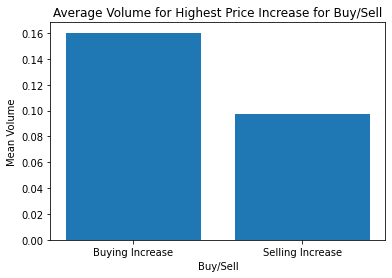

In [147]:
increase_label_x = ['Buying Increase', 'Selling Increase']      #defining labels for the x-axis to distinguish between buying and selling activities during the increase
average_volume_for_increase = [average_volume_increase_buying, average_volume_increase_selling]     #creating a list of average volume values for buying and selling during the increase
plt.bar(increase_label_x, average_volume_for_increase)      #creating a bar chart using the specified labels and average volume values
plt.xlabel('Buy/Sell')      #setting the x-axis label
plt.ylabel('Mean Volume')   #setting the y-axis label
plt.title('Average Volume for Highest Price Increase for Buy/Sell')     #setting the title for the bar plot
plt.show()      #displaying the bar plot

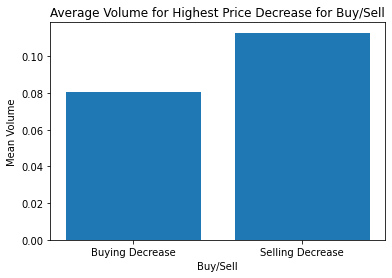

In [148]:
decrease_label_x = ['Buying Decrease', 'Selling Decrease']      #defining labels for the x-axis to distinguish between buying and selling activities during the decrease
average_volume_for_decrease = [average_volume_decrease_buying, average_volume_decrease_selling]     #creating a list of average volume values for buying and selling during the decrease
plt.bar(decrease_label_x, average_volume_for_decrease)      #creating a bar chart using the specified labels and average volume values
plt.xlabel('Buy/Sell')      #setting the x-axis label
plt.ylabel('Mean Volume')   #setting the y-axis label
plt.title('Average Volume for Highest Price Decrease for Buy/Sell')     #setting the title for the bar plot
plt.show()      #displaying the bar plot
